We will use the [Fuel](https://github.com/mila-udem/fuel) library to access datasets. Fuel is designed to provide easy iteration over large datasets, however in this assignment we will only use its ability to download and convert some standard datasets for us.

We will use the following datasets:
1. IRIS https://archive.ics.uci.edu/ml/datasets/Iris available as `fuel.datasets.iris.Iris`
2. MNIST http://yann.lecun.com/exdb/mnist/ available as `fuel.datasets.mnist.MNIST`
3. CIFAR10 http://www.cs.toronto.edu/~kriz/cifar.html available as `fuel.datasets.cifar10.CIFAR10`

On lab computers the datasets have already been downloaded for you into the `/pio/data/data/fuel` directory. Make sure to add it to the `FUEL_DATA_PATH` environment variable!

If you are working from your computer, you can either use the Fuel downloader and converter utulities (http://fuel.readthedocs.org/en/latest/built_in_datasets.html) or download the HDF5 datasets:

1. [Iris](https://drive.google.com/uc?export=download&id=0B5j9vIO_Njwcb2ItV2ZLakR6MEk)
2. [MNIST](https://drive.google.com/uc?export=download&id=0B5j9vIO_NjwcNnYzVTNIVGxaSEk)
3. [CIFAR10](https://drive.google.com/uc?export=download&id=0B5j9vIO_NjwcOEdlU2RtNkc2bW8)


In [2]:
%pylab inline
import sys
sys.path.append('../')

Populating the interactive namespace from numpy and matplotlib


# Problem 1

We have 50000 training, 10000 validation, and 10000 test examples
The examples are pairs of ('features', 'targets'):
The source #0 named "features" is a 4 array with axis: ('batch', 'channel', 'height', 'width')
The source #1 named "targets" is a 2 array with axis: ('batch', 'index')


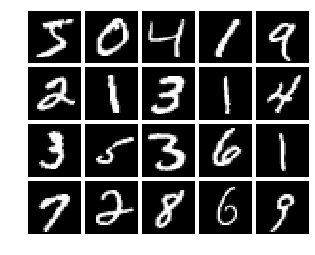

In [3]:
# loading MNIST data

from fuel.datasets.mnist import MNIST
from common.plotting import plot_mat

mnist_train = MNIST(("train",), subset=slice(None,50000))
mnist_validation = MNIST(("train",), subset=slice(50000, None))
mnist_test = MNIST(("test",))

print("We have {} training, {} validation, and {} test examples".format(
    mnist_train.num_examples, mnist_validation.num_examples, mnist_test.num_examples))
      
print("The examples are pairs of {}:".format(mnist_train.sources))

for i, source in enumerate(mnist_train.sources):
    labels = mnist_train.axis_labels[source]
    print('The source #{} named "{}" is a {} array with axis: {}'.format(
        i, source, len(labels), labels))



    
#Note that for larger datasets that are loaded into mameory the data_sources field may not exist!
plot_mat(mnist_train.data_sources[0][:20], cmap='gray')

In [ ]:
#
# TODO: plot an example of each class on MNIST and on CIFAR
#

In [ ]:
#Extract the data matrices

mnist_train_X = (mnist_train.data_sources[0].reshape(mnist_train.num_examples, -1) / 255.0).astype(np.single)
mnist_train_Y = mnist_train.data_sources[1].ravel()

mnist_valid_X = (mnist_validation.data_sources[0].reshape(mnist_validation.num_examples, -1) / 255.0).astype(np.single)
mnist_valid_Y = mnist_validation.data_sources[1].ravel()

In [ ]:
from scipy.stats import mode

def KNN(train_X, train_Y, test_X, test_Y, ks, batch_size=200):
    """
    Compute error rate for various 
    """
    errs = np.zeros((len(ks),))
    for i in xrange(0,test_Y.shape[0], batch_size):
        batch_X = test_X[i:i + batch_size]
        batch_Y = test_Y[i:i + batch_size]
        print "Examples %d:%d Computing distances... " %(i,i+batch_size), 
        
        #
        # TODO: fill in an efficient distance matrix computation 
        #
        dists = TODO
        
        print "Sorting... ",
        closest = np.argsort(dists,0)

        print "Computing errors..."
        targets = train_Y[closest]
        
        for ki,k in enumerate(ks):
            predictions, unused_counts = mode(targets[:k,:], axis=0)
            predictions = predictions.ravel()
            #
            # TODO: fill in error count computation
            #
            errs[ki] += TODO
        
    errs /= test_Y.shape    
    return np.vstack((ks, errs))

In [ ]:
# Now find the best k on the validation set

mnist_validation_errs = KNN(mnist_train_X, mnist_train_Y, mnist_valid_X, mnist_valid_Y, [1,3,5,7,9])
plot(mnist_validation_errs[0,:], mnist_validation_errs[1,:])


In [ ]:
# Now use the best k to compute the test error

best_K =  TODO

mnist_full_train = MNIST(("train",), )

mnist_full_train_X = (mnist_full_train.data_sources[0].reshape(mnist_full_train.num_examples, -1) / 255.0).astype(np.single)
mnist_full_train_Y = mnist_full_train.data_sources[1].ravel()

mnist_test_X = (mnist_test.data_sources[0].reshape(mnist_test.num_examples, -1) / 255.0).astype(np.single)
mnist_test_Y = mnist_test.data_sources[1].ravel()

mnist_test_errs = KNN(mnist_full_train_X, mnist_full_train_Y, mnist_test_X, mnist_test_Y, [best_K])
print "When k=%d the test error rate is %.1f%%" % (mnist_test_errs[0,0], mnist_test_errs[1,0]*100.0)

In [ ]:
#
# Now repeat the k-NN training for CIFAR10
#

# Problem 2

In [ ]:
#
# Solve problem 2 here
#

# Problem 3

In [ ]:
from common.gradients import check_gradient,numerical_gradient

In [ ]:
# A sample function for debugging purposes

def quadratic(X):
    value = X[0]**2 + 2*X[1]**2
    grad = np.array([2*X[0], 2*X[1]]) # TODO
    return (value, grad)


# Let's check if the gradientis correctly computed
check_gradient(quadratic, np.array([0,0]))
check_gradient(quadratic, np.array([1.0,1.0]))

# Oh noes! We have an error in gradient computation - please correct it!

In [ ]:
#
# Fill in the details of the gradient computation
#

def GD(f, Theta0, alpha, stop_tolerance=1e-10, max_steps=1000000):
    history = [Theta0]
    
    Theta = Theta0
    value = np.inf
    
    step = 0
    while step<max_steps:
        previous_value = value
        value, gradient = f(Theta)
        if TODO: #fill in a stopping condition here
            break
        
        Theta = TODO #fill in the gradient descent rule
        history.append(Theta)
        step += 1
    return Theta, history

In [ ]:
#
# Test the GD procedure on the quadratic function
#

Xopt, Xhist = GD(quadratic, np.array((1,1)), 1e-1)
print "Found optimum at %s in %d steps (true minimum is at [0,0])" % (Xopt, len(Xhist))

In [ ]:
#
# Now implement the Rosenbrock function 
#

def rosenbrock(x):
    val = TODO
    grad = TODO
    return val, grad

#
# And test its gradient
#
check_gradient(rosenbrock, np.array([0.,0.]), delta=1e-8)
check_gradient(rosenbrock, np.array([1.0,1.0]), delta=1e-8)

#
# Find the optimum
#

X0= (0.,2.)
Xopt, Xhist = GD(rosenbrock, X0, alpha=TODO, stop_tolerance=1e-10)
Xhist = np.array(Xhist)

print "Found optimum at %s in %d steps (true minimum is at [1,1])" % (Xopt, len(Xhist))

#
# Plot the value over iterations
#

#TODO

#
# Make a contour plot
#
# you may want to use functions: meshgrid, contour
#



In [ ]:
#
# Use scipy.optimize.fmin_l_bfgs_b
# Again plot the path on the coutnour plot
#
# Hint: to save the points you can use the callback argument!
#
#


# Problem 4

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print 'Features: ', iris.feature_names
print 'Targets: ', iris.target_names
petal_length = iris.data[:,iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

In [ ]:
#Extract the petal_length and petal_width of versicolors and virginicas

IrisX = np.vstack([np.ones_like(petal_length), petal_length, petal_width])
IrisX = IrisX[:, iris.target!=0]

# Set versicolor=0 and virginia=1
IrisY = (iris.target[iris.target!=0]-1).reshape(1,-1).astype(np.float64)

scatter(IrisX[1,:], IrisX[2,:], c=IrisY.ravel(), cmap='spring')
xlabel('petal_length')
ylabel('petal_width')

In [ ]:
class LogisticRegressionCost(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    
    #note: this creates a Pyton callable - i.e. an abject that can be called as a function
    def __call__(self, Theta):
        X = self.X
        Y = self.Y
        
        #reshape Theta
        ThetaR = Theta.reshape(X.shape[0],1)
        
        #
        # Fill in negative log likelihood computation
        # and gradient computation
        #
        # Properly implemented, this takes about 3 lines of code!
        #
        
        nll = TODO
        
        grad = TODO
        
        #reshape gard into the shape of Theta, for fmin_l_bfsgb to work
        return nll, grad.reshape(Theta.shape)

iris_log_reg = LogisticRegressionCost(IrisX, IrisY)

Theta0 = np.zeros((3))
check_gradient(iris_log_reg, Theta0)

#
# Maybe check the gradients at a few other points too?
#


#
# Call a solver
#

ThetaOpt = GD(iris_log_reg, Theta0, alpha=TODO)[0]

#
# TODO: also tru f_min_lbfsgb??
#

check_gradient(iris_log_reg, ThetaOpt)


#
# Now plot the found separation line 
# 

